In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8704 - loss: 0.4195 - val_categorical_accuracy: 0.9508 - val_loss: 0.1624
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9544 - loss: 0.1498 - val_categorical_accuracy: 0.9523 - val_loss: 0.1596
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9617 - loss: 0.1265 - val_categorical_accuracy: 0.9565 - val_loss: 0.1444
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9672 - loss: 0.1093 - val_categorical_accuracy: 0.9608 - val_loss: 0.1406
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9694 - loss: 0.0984 - val_categorical_accuracy: 0.9584 - val_loss: 0.1536
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9682 - loss: 0.1065 - val_categorical_accuracy: 0.9657 - val_loss: 0.1344
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy

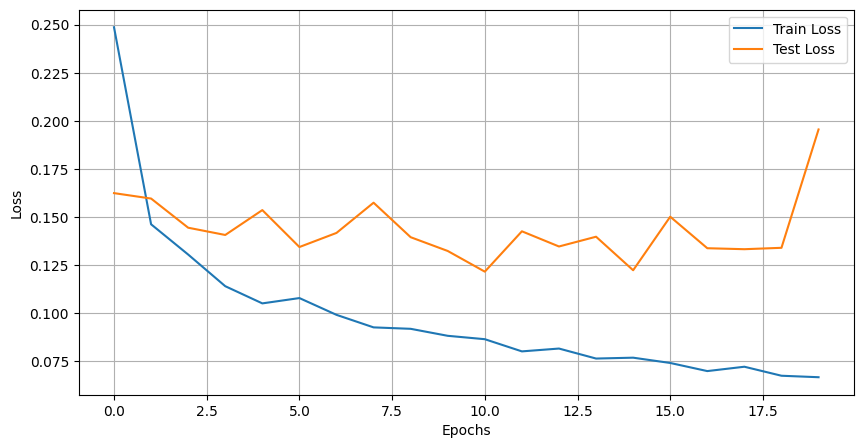

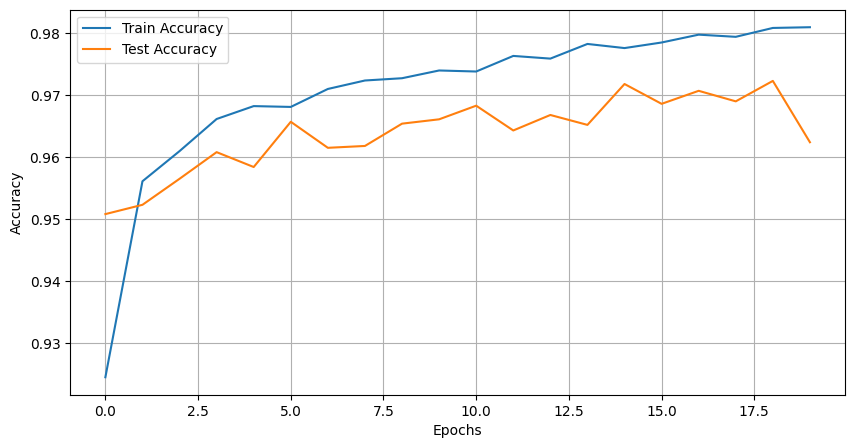

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

num_features = 784  
num_classes = 10  

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

class NN(tf.keras.Model):
    def __init__(self):
        super(NN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='sigmoid')
        self.dense2 = tf.keras.layers.Dense(256, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x
        
def plot_history(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

model = NN()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

history = model.fit(x_train, y_train_one_hot, epochs=20, batch_size=32, validation_data=(x_test, y_test_one_hot))

plot_history(history)
